In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
#keras.datasets.california_housing.load_data(version="large", path="california_housing.npz", test_split=0.2, seed=113)

In [2]:
housing=fetch_california_housing()

X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data , housing.target , random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)


In [4]:
len(X_train_full)

15480

In [6]:
len(X_train)

11610

In [5]:
len(X_valid)

3870

In [7]:
len(X_test)

5160

In [8]:
len(y_test)

5160

In [ ]:
print(X_train)

In [14]:
df_train=pd.DataFrame(X_train,columns=housing.feature_names)
print(df_train.head())

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  3.5214      15.0  3.049945  ...  1.605993     37.63    -122.43
1  5.3275       5.0  6.490060  ...  3.443340     33.69    -117.39
2  3.1000      29.0  7.542373  ...  2.250847     38.44    -122.98
3  7.1736      12.0  6.289003  ...  2.695652     33.55    -117.70
4  2.0549      13.0  5.312457  ...  2.244384     33.93    -116.93

[5 rows x 8 columns]


In [16]:
pd_y=pd.DataFrame(y_train)
print(pd_y.head())

       0
0  1.442
1  1.687
2  1.621
3  2.621
4  0.956


In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [18]:
df_train1=pd.DataFrame(X_train,columns=housing.feature_names)
print(df_train1.head())

     MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0 -0.193979 -1.077813 -0.943385  ... -0.572916  0.929260  -1.422155
1  0.751983 -1.868895  0.405478  ...  0.205165 -0.916547   1.096670
2 -0.414691  0.029701  0.818088  ... -0.299833  1.308729  -1.697027
3  1.718896 -1.315138  0.326644  ... -0.111466 -0.982134   0.941742
4 -0.962072 -1.236030 -0.056258  ... -0.302570 -0.804112   1.326562

[5 rows x 8 columns]


In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
X_train.shape[1:]

(8,)

In [37]:
#Define NN Architecture,compile loss and train 

model=keras.models.Sequential([
    keras.layers.Dense( 30 ,activation="relu" , input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
#keras.layers.Dense( 10 , activation="relu") -removed to make model simpler-since we saw overfitting(validation loss increasing after some time)
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.005))

history=model.fit(X_train, y_train , epochs=60 , validation_data=(X_valid , y_valid))
              

Epoch 1/60


c:\Users\Nanditha\Desktop\Neural Network Projects\Fashion\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7113 - val_loss: 26.4312
Epoch 2/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6519 - val_loss: 16.5143
Epoch 3/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5782 - val_loss: 0.4545
Epoch 4/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4654 - val_loss: 0.4294
Epoch 5/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4471 - val_loss: 0.4107
Epoch 6/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4358 - val_loss: 0.3961
Epoch 7/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4278 - val_loss: 0.3857
Epoch 8/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4215 - val_loss: 0.3794
Epoch 9/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4163 - val_loss: 0.3764
Epoch 10/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4117 - val_loss: 0.3749
Epoch 11/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4076 - val_loss: 0.3750
Epoch 12/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 

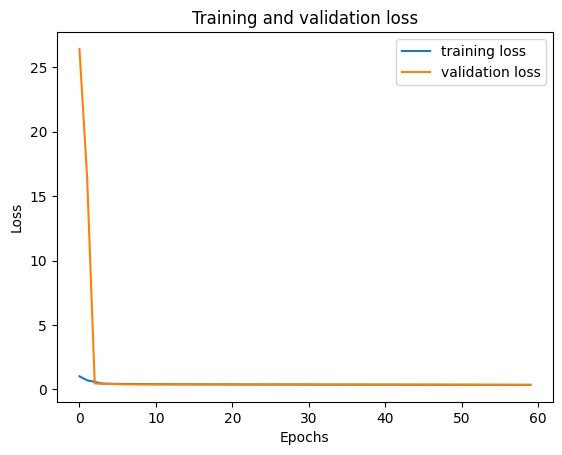

In [38]:
plt.plot(history.history['loss'] ,label='training loss')
plt.plot(history.history['val_loss'] ,label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()


In [39]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3432


0.3419138193130493

In [40]:
X_new=X_test[ :3]
y_pred= model.predict(X_new)

#comparing predictions with actual values

for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Prediction : {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Sample 1:
Prediction : 0.6537083387374878
Actual: 0.477
Sample 2:
Prediction : 1.408320426940918
Actual: 0.458
Sample 3:
Prediction : 4.158162593841553
Actual: 5.00001
